# Passo 2: Preparar os dados


Para a etapa de preparação os dados foram importados e transformados em plots para facilitar a visualização e fornecer insights sobre o seu comportamento e forma.

Além disso, para minimizar o impacto de sazonalidades e tendências, os dados foram transformados em estacionários, um passo necessário para a realização do teste de Granger Causality, o qual foi aplicado com objetivo de identificar se há ou não relação de causalidade entre as séries temporais e para selecionar quais delas podem ser utilizadas para a previsão de informações futuras.


In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np

from datetime import date

Importamos o objeto **dados** salvo no passo anterior

In [2]:
file_to_read = open("datasets/dados.pickle", "rb")
dados = pickle.load(file_to_read)
file_to_read.close()

# **Plots**

Alguns plots em busca de insights.

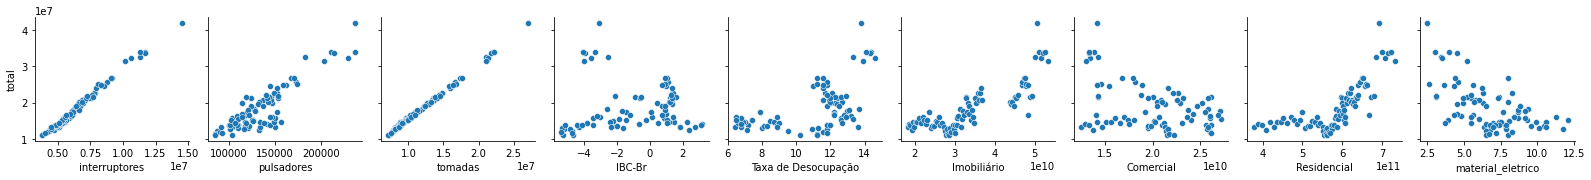

In [3]:
# Observação dos plots do 'total' de vendas (Tomadas+pulsadores+interruptores) - RECORTE 1.
sns.pairplot(dados, y_vars='total', x_vars=['interruptores', 'pulsadores', 'tomadas', 'IBC-Br', 'Taxa de Desocupação',
                                            'Imobiliário', 'Comercial', 'Residencial', 'material_eletrico'])
plt.show()

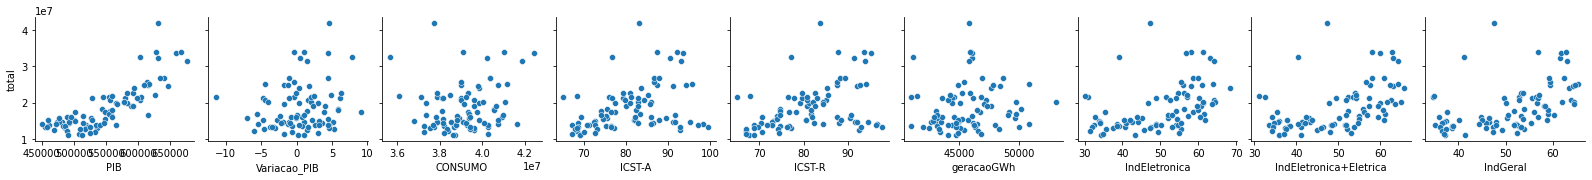

In [4]:
# Observação dos plots das vendas de 'total' - RECORTE 2.
sns.pairplot(dados, y_vars='total', x_vars=['PIB', 'Variacao_PIB','CONSUMO','ICST-A', 'ICST-R', 'geracaoGWh',
                                                    'IndEletronica', 'IndEletronica+Eletrica', 'IndGeral'])
plt.show()

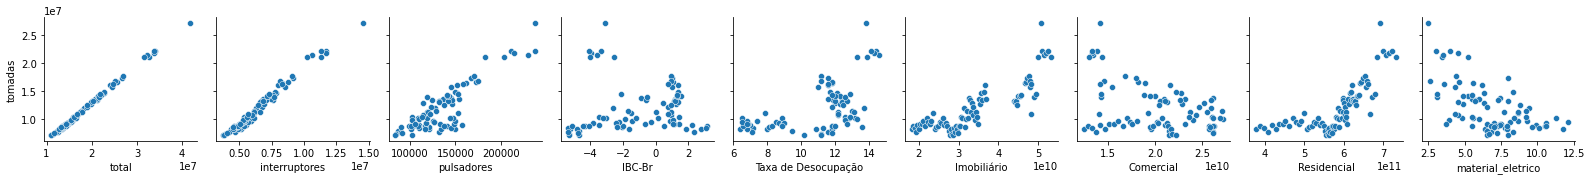

In [5]:
# Observação dos plots das vendas de 'tomadas'- RECORTE 1.
sns.pairplot(dados, y_vars='tomadas', x_vars=['total','interruptores', 'pulsadores', 'IBC-Br', 'Taxa de Desocupação',
                                            'Imobiliário', 'Comercial', 'Residencial', 'material_eletrico'])
plt.show()

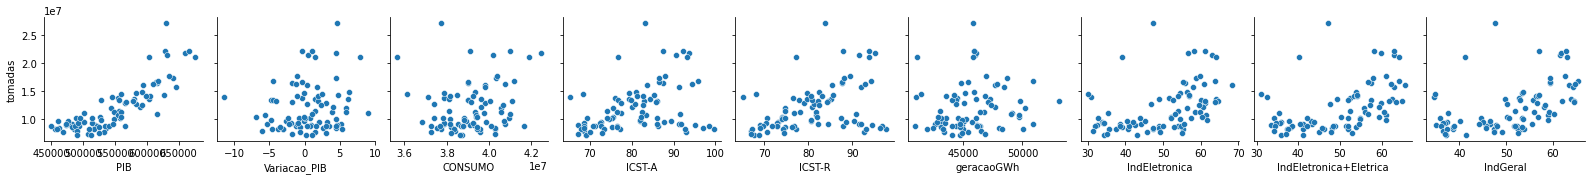

In [6]:
# Observação dos plots das vendas de 'tomadas' - RECORTE 2.
sns.pairplot(dados, y_vars='tomadas', x_vars=['PIB', 'Variacao_PIB','CONSUMO','ICST-A', 'ICST-R', 'geracaoGWh',
                                                    'IndEletronica', 'IndEletronica+Eletrica', 'IndGeral'])
plt.show()

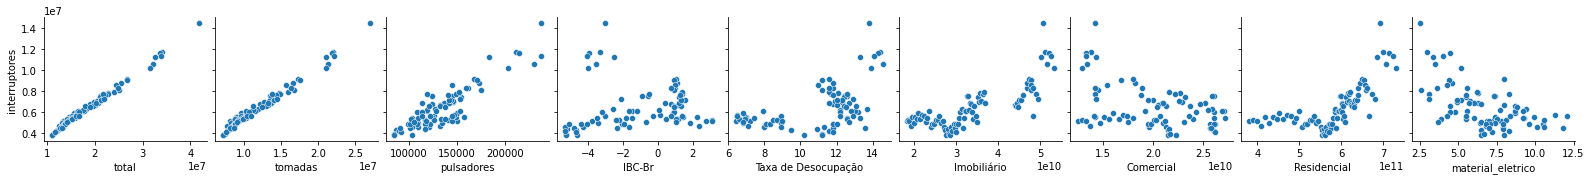

In [7]:
# Observação dos plots das vendas de 'interruptores'- RECORTE 1.
sns.pairplot(dados, y_vars='interruptores', x_vars=['total', 'tomadas', 'pulsadores', 'IBC-Br', 'Taxa de Desocupação',
                                            'Imobiliário', 'Comercial', 'Residencial', 'material_eletrico'])
plt.show()

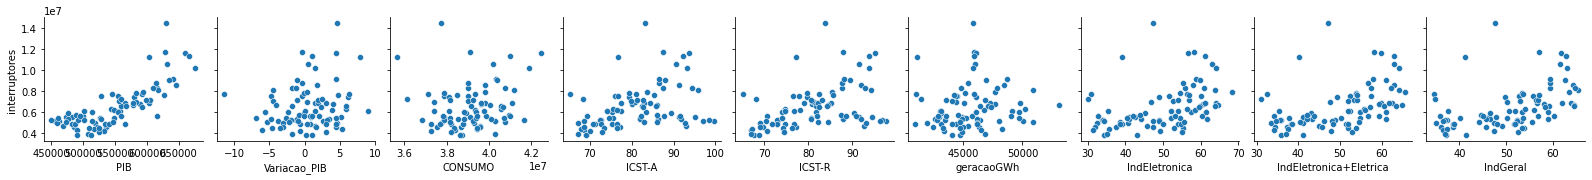

In [8]:
# Observação dos plots das vendas de 'interruptores' - RECORTE 2.
sns.pairplot(dados, y_vars='interruptores', x_vars=['PIB', 'Variacao_PIB','CONSUMO','ICST-A', 'ICST-R', 'geracaoGWh',
                                                    'IndEletronica', 'IndEletronica+Eletrica', 'IndGeral'])
plt.show()

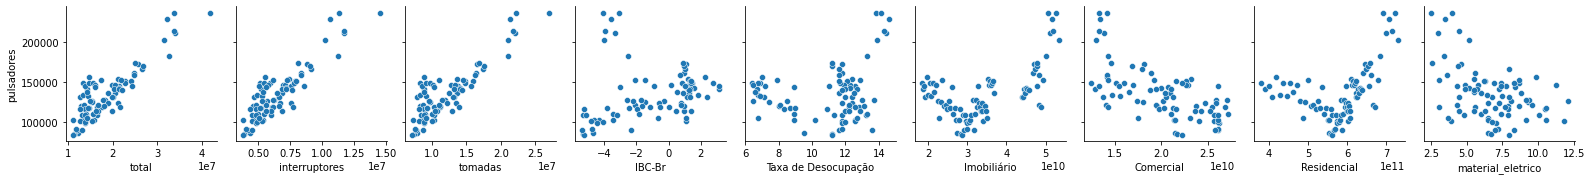

In [9]:
# Observação dos plots das vendas de 'pulsadores' - RECORTE 1.
sns.pairplot(dados, y_vars='pulsadores', x_vars=['total', 'interruptores', 'tomadas', 'IBC-Br', 'Taxa de Desocupação',
                                            'Imobiliário', 'Comercial', 'Residencial', 'material_eletrico'])
plt.show()

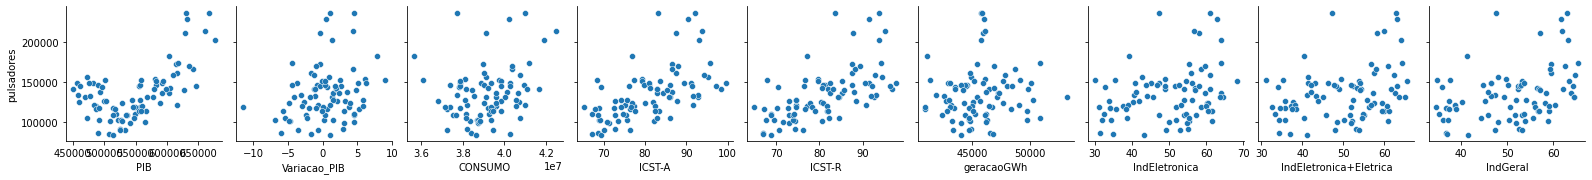

In [10]:
# Observação dos plots das vendas de 'pulsadores' - RECORTE 2.
sns.pairplot(dados, y_vars='pulsadores', x_vars=['PIB', 'Variacao_PIB','CONSUMO','ICST-A', 'ICST-R', 'geracaoGWh',
                                                    'IndEletronica', 'IndEletronica+Eletrica', 'IndGeral'])
plt.show()

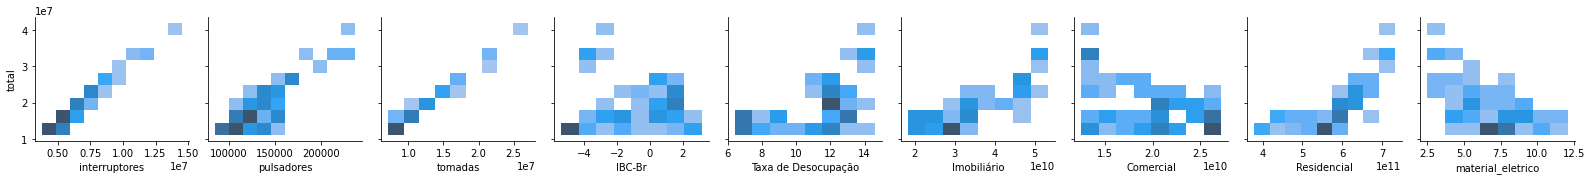

In [11]:
# Observação dos plots do 'total' de vendas (Tomadas+pulsadores+interruptores) - RECORTE 1.
sns.pairplot(dados, y_vars='total', x_vars=['interruptores', 'pulsadores', 'tomadas', 'IBC-Br', 'Taxa de Desocupação',
                                            'Imobiliário', 'Comercial', 'Residencial', 'material_eletrico'],  kind="hist")
plt.show()

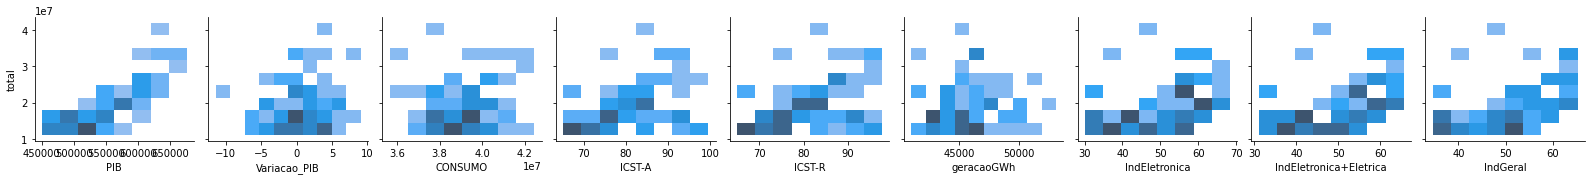

In [12]:
# Observação dos plots do 'total' de vendas (Tomadas+pulsadores+interruptores) - RECORTE 2.
sns.pairplot(dados, y_vars='total', x_vars=['PIB', 'Variacao_PIB','CONSUMO','ICST-A', 'ICST-R', 'geracaoGWh',
                                                    'IndEletronica', 'IndEletronica+Eletrica', 'IndGeral'],  kind="hist")
plt.show()

Ao que parece as vendas de tomadas, interruptores e pulsadores estão relacionadas. Usaremos apenas o 'total'?

In [13]:
dados = dados.rename(columns={'IBC-Br':'ibc','Taxa de Desocupação':'desemprego','Imobiliário':'imobiliario','Comercial':'comercial','Residencial':'residencial','PIB':'pib','Variacao_PIB':'variacao_pib','CONSUMO':'consumo'})
dados = dados.drop(['year', 'month','day'], axis=1)
dados.corr()


,interruptores,pulsadores,tomadas,total,ibc,desemprego,imobiliario,comercial,residencial,material_eletrico,pib,variacao_pib,consumo,ICST-A,ICST-R,geracaoGWh,IndEletronica,IndEletrica,IndEletronica+Eletrica,IndGeral
interruptores,1.000000,0.886950,0.989260,0.995224,0.115787,0.513427,0.786555,-0.429736,0.685025,-0.575877,0.784588,0.181344,0.151601,0.385183,0.420987,0.090170,0.413813,0.496855,0.461891,0.464844
pulsadores,0.886950,1.000000,0.869474,0.878505,0.194732,0.214204,0.572859,-0.652046,0.401692,-0.440588,0.582705,0.230787,0.248615,0.582000,0.616158,0.088726,0.276526,0.354477,0.320157,0.375115
tomadas,0.989260,0.869474,1.000000,0.998799,0.080536,0.567933,0.841516,-0.401740,0.750327,-0.593254,0.835448,0.162918,0.173872,0.355234,0.388990,0.123818,0.452127,0.537273,0.501796,0.497976
total,0.995224,0.878505,0.998799,1.000000,0.092943,0.549905,0.824605,-0.413443,0.729331,-0.588537,0.819948,0.169809,0.167476,0.367315,0.401846,0.112964,0.439995,0.524669,0.489260,0.487958
ibc,0.115787,0.194732,0.080536,0.092943,1.000000,-0.234901,0.019020,-0.301964,-0.187121,-0.182413,0.038570,-0.073258,0.214063,0.666022,0.652780,0.206875,0.330719,0.326324,0.332900,0.438508
desemprego,0.513427,0.214204,0.567933,0.549905,-0.234901,1.000000,0.772372,0.347935,0.891297,-0.505044,0.766155,0.072114,-0.047910,-0.203637,-0.195233,0.063939,0.594997,0.614217,0.612815,0.511049
imobiliario,0.786555,0.572859,0.841516,0.824605,0.019020,0.772372,1.000000,-0.209289,0.936172,-0.674161,0.931737,0.043947,0.125921,0.160076,0.175377,0.150830,0.526674,0.628998,0.586141,0.569568
comercial,-0.429736,-0.652046,-0.401740,-0.413443,-0.301964,0.347935,-0.209289,1.000000,0.077912,0.304309,-0.094646,0.017901,-0.307418,-0.670440,-0.667098,-0.065856,0.173789,0.053519,0.114519,-0.018565
residencial,0.685025,0.401692,0.750327,0.729331,-0.187121,0.891297,0.936172,0.077912,1.000000,-0.588045,0.909991,0.059823,0.024430,-0.104392,-0.082454,0.085968,0.508927,0.590729,0.557645,0.483214
material_eletrico,-0.575877,-0.440588,-0.593254,-0.588537,-0.182413,-0.505044,-0.674161,0.304309,-0.588045,1.000000,-0.582912,0.108658,-0.017230,-0.255858,-0.246613,-0.097196,-0.327240,-0.438243,-0.388479,-0.402976


De fato, a partir dos valores da matriz de correlações, podemos usar o 'total' no modelo de predição.

In [14]:
dados.to_csv('datasets/dados.csv', index=True) #salva junto o index (meses)

## Transformar os dados em estacionários

In [8]:
# The Augmented Dickey-Fuller test can be used to test for a unit root 
# in a univariate process in the presence of serial correlation.
# h0 = série temporal é NAO estacionária
# h1 = série temporal é estacionária
# OUTPUT = estatística-teste ; p-value ; critical-values (valores do teste para
# diferentes valores de ALPHA)
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html
from statsmodels.tsa.stattools import adfuller
def test_stationary(dataset):
    for variable in dataset.columns:
        result = adfuller(dataset[variable])
        print(variable)
        print('ADF Statistic: %f' % result[0]) 
        print('p-value: %f' % result[1])
        print('Critical Values:')
        for key, value in result[4].items(): 
            print('\t%s: %.3f' % (key, value))    

test_stationary(dados)


interruptores
ADF Statistic: -1.963913
p-value: 0.302617
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586
pulsadores
ADF Statistic: 0.670854
p-value: 0.989238
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
tomadas
ADF Statistic: 1.809575
p-value: 0.998368
Critical Values:
	1%: -3.521
	5%: -2.901
	10%: -2.588
total
ADF Statistic: 1.787845
p-value: 0.998325
Critical Values:
	1%: -3.521
	5%: -2.901
	10%: -2.588
ibc
ADF Statistic: -1.499994
p-value: 0.533514
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
desemprego
ADF Statistic: -2.074337
p-value: 0.254958
Critical Values:
	1%: -3.525
	5%: -2.903
	10%: -2.589
imobiliario
ADF Statistic: 0.604146
p-value: 0.987717
Critical Values:
	1%: -3.512
	5%: -2.897
	10%: -2.586
comercial
ADF Statistic: -0.871417
p-value: 0.797239
Critical Values:
	1%: -3.513
	5%: -2.897
	10%: -2.586
residencial
ADF Statistic: 3.333425
p-value: 1.000000
Critical Values:
	1%: -3.518
	5%: -2.900
	10%: -2.587
material_eletrico
ADF Statistic: 0.155120
p-

Percebe-se que apenas variacao_PIB (que indica a variação mensal do PIB) é uma série temporal **estacionária**. Pra todas as demais, é necessário transformar, pois os algoritmos que serão utilizados para predição têm, como premissa, a aplicação sobre uma série temporal estacionária.

Para o teste Granger Causality, pressupoe-se uma série estacionária. Ao se utilizar uma série não estacionária, poderá se obter falsos valores de 'granger-causalidade'.

In [11]:
# Transformar em séries estacionárias

# Diferencia cada série temporal num processo
# iterativo até todas as séries se transformarem
# em série estacionária
def transform_series(dataset):
    for variable in dataset.columns:
        p_value = adfuller(dataset[variable])[1]
        while p_value > 0.05:
            dataset = dataset.diff().dropna()
            p_value = adfuller(dataset[variable])[1]
    dataset = dataset.dropna()
    return dataset

# pct_change() - Computes the percentage change from the immediately 
# previous row by default.
# diff() - Calculates the difference of a Dataframe element compared 
# with another element in the Dataframe (default is element in previous row).

dados_st = transform_series(dados)

test_stationary(dados_st)



interruptores
ADF Statistic: -5.412712
p-value: 0.000003
Critical Values:
	1%: -3.530
	5%: -2.905
	10%: -2.590
pulsadores
ADF Statistic: -6.003111
p-value: 0.000000
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
tomadas
ADF Statistic: -5.563617
p-value: 0.000002
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
total
ADF Statistic: -5.515656
p-value: 0.000002
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
ibc
ADF Statistic: -2.976659
p-value: 0.037132
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
desemprego
ADF Statistic: -8.859378
p-value: 0.000000
Critical Values:
	1%: -3.527
	5%: -2.904
	10%: -2.589
imobiliario
ADF Statistic: -5.936292
p-value: 0.000000
Critical Values:
	1%: -3.526
	5%: -2.903
	10%: -2.589
comercial
ADF Statistic: -5.268500
p-value: 0.000006
Critical Values:
	1%: -3.529
	5%: -2.904
	10%: -2.590
residencial
ADF Statistic: -8.389298
p-value: 0.000000
Critical Values:
	1%: -3.523
	5%: -2.902
	10%: -2.588
material_eletrico
ADF Statistic: -7.443

In [12]:
dados_st 

,interruptores,pulsadores,tomadas,total,ibc,desemprego,imobiliario,comercial,residencial,material_eletrico,pib,variacao_pib,consumo,ICST-A,ICST-R,geracaoGWh,IndEletronica,IndEletrica,IndEletronica+Eletrica,IndGeral
2014-04-01,-7796.0,-28694.0,535538.0,499048.0,-0.26,-0.8,9.856883e+04,4.254844e+05,5.896661e+06,-1.6,-22570.5,-6.380113,3464269.000,-2.8,-4.000000e+00,-9267.019342,-1.9,3.4,0.856,-4.2
2014-05-01,1541671.0,54095.0,2179181.0,3774947.0,1.26,0.6,1.002974e+05,4.392966e+05,6.043845e+06,5.6,3165.2,5.771805,-520263.000,9.4,9.000000e+00,6205.632503,3.1,1.2,2.112,5.2
2014-06-01,-2761669.0,-85449.0,-3568943.0,-6416061.0,-0.82,-0.1,-1.115147e+07,1.099647e+08,-1.266728e+09,-10.7,-17382.1,-4.395093,-1068891.120,-11.2,-9.200000e+00,-4467.068100,1.3,6.2,3.848,-1.1
2014-07-01,2654039.0,85808.0,3321457.0,6061304.0,0.22,0.4,6.523308e+07,-2.792775e+08,8.892933e+08,11.1,57718.3,16.020811,2397033.360,5.5,3.500000e+00,6339.293227,1.1,-6.8,-3.008,-1.3
2014-08-01,-1875403.0,-68732.0,-2458900.0,-4403035.0,0.10,-0.4,-6.704298e+07,2.165989e+08,5.508340e+07,-5.4,-66726.7,-26.762437,-970813.360,1.3,1.900000e+00,-5318.303789,0.6,2.0,1.328,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,-5254047.0,-104238.0,-10283504.0,-15641789.0,0.38,0.0,-1.393647e+08,-8.866488e+07,-4.457559e+08,2.6,-12716.7,7.267532,-3262998.857,-0.1,-2.842171e-14,-9482.313443,4.0,8.3,6.236,3.1
2020-09-01,7755969.0,123974.0,15321452.0,23201395.0,-0.17,-0.5,2.281863e+08,1.555618e+08,-1.235903e+09,-1.4,34726.1,7.218936,428291.246,0.8,2.100000e+00,4494.160730,-8.9,-10.9,-9.940,-7.8
2020-10-01,405904.0,-77969.0,-3096277.0,-2768342.0,-0.25,-0.1,-2.071667e+07,3.749437e+08,1.042359e+09,0.5,19645.0,-2.601001,1443950.224,1.5,4.000000e-01,3.089064,-5.2,0.8,-2.080,0.4
2020-11-01,-3534558.0,72526.0,-1389898.0,-4851930.0,0.43,0.6,7.201459e+07,-2.039821e+08,-3.097203e+08,-2.0,-46346.8,-10.477889,-4839471.063,-4.9,-5.100000e+00,-229.690454,21.9,7.3,14.308,5.3


In [13]:
dados_st.to_csv('datasets/dados_st.csv', index=True)

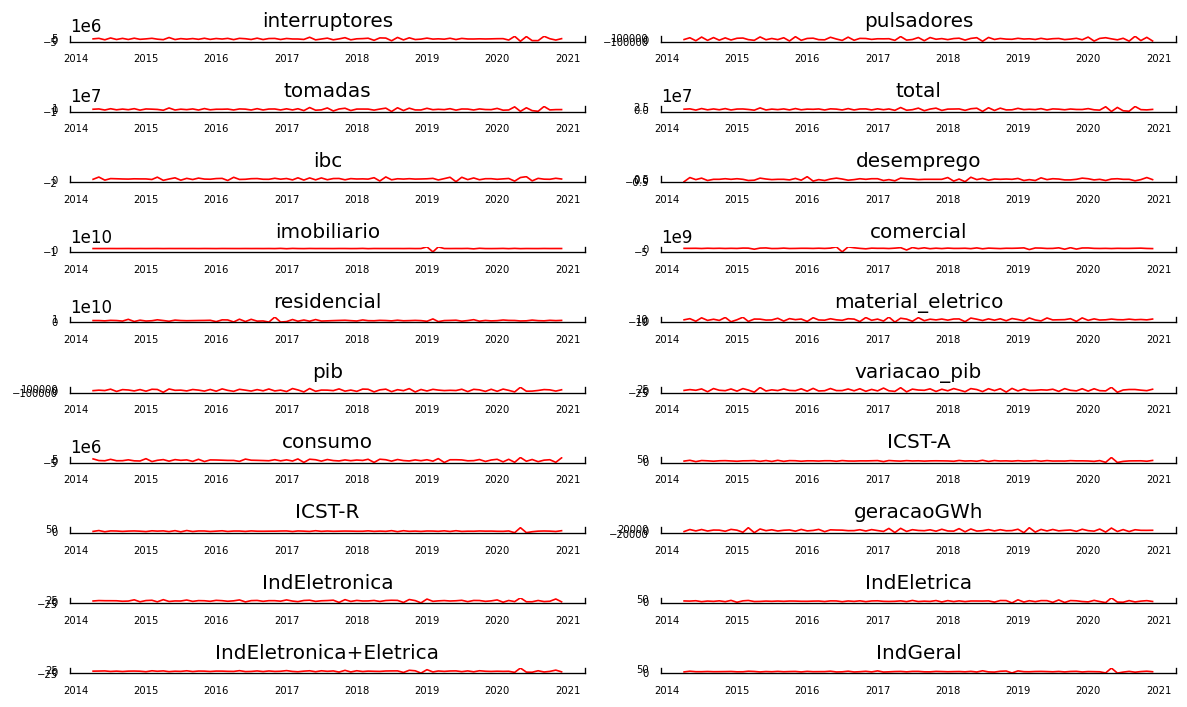

In [14]:
fig, axes = plt.subplots(nrows=10, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
  d = dados_st[dados_st.columns[i]]
  ax.plot(d, color='red', linewidth=1)
# Decorations
  ax.set_title(dados_st.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines['top'].set_alpha(0)
  ax.tick_params(labelsize=6)
  plt.tight_layout();

In [17]:
## Agora todas as séries são estáticas, podemos
# testar o Granger Causality Test
from statsmodels.tsa.stattools import grangercausalitytests
def grangers_causation_matrix(data, x, y, maxlag, test='ssr_chi2test', verbose=False):    
    df = pd.DataFrame(np.zeros((len(y), len(x))), columns=x, index=y)
    for preditor in x:
        for resultado in y:
            test_result = grangercausalitytests(data[[resultado, preditor]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]    
            min_p_value = np.min(p_values)    
            df.loc[resultado, preditor] = min_p_value
    return df
dados_st.columns

y = ['interruptores', 'pulsadores', 'tomadas', 'total']
x = ['ibc', 'desemprego', 'imobiliario', 'comercial', 'residencial', 
     'material_eletrico', 'pib', 'variacao_pib', 'consumo', 'ICST-A',	
     'ICST-R',	'geracaoGWh',	'IndEletronica',	'IndEletrica',	
     'IndEletronica+Eletrica',	'IndGeral']

maxlag = 12
test = 'ssr_chi2test'
grangers_causation_matrix(dados_st,x,y,maxlag, test=test)     


,ibc,desemprego,imobiliario,comercial,residencial,material_eletrico,pib,variacao_pib,consumo,ICST-A,ICST-R,geracaoGWh,IndEletronica,IndEletrica,IndEletronica+Eletrica,IndGeral
interruptores,0.0,0.1533,0.4821,0.1427,0.1453,0.1527,0.0074,0.0159,0.0000,0.0,0.0,0.0000,0.0,0.0000,0.0000,0.0000
pulsadores,0.0,0.0007,0.0590,0.0059,0.0001,0.0024,0.0069,0.0141,0.0000,0.0,0.0,0.0008,0.0,0.0013,0.0008,0.0003
tomadas,0.0,0.0894,0.1625,0.1142,0.0253,0.1225,0.0554,0.0667,0.0004,0.0,0.0,0.0011,0.0,0.0000,0.0000,0.0000
total,0.0,0.1249,0.2781,0.1401,0.0505,0.1256,0.0268,0.0523,0.0001,0.0,0.0,0.0003,0.0,0.0000,0.0000,0.0000


A priori as variáveis **taxa de desemprego**, **direcionamento dos depósitos de poupança para construção civil**, **financiamento comercial** e **exportação de material elétrico** não "explicam" (Granger causam) o comportamento de venda do total dos produtos.  

Variáveis a manter:

*   IBC-Br
*   PIB
*   Consumo de Energia Elétrica
*   Índice de Confiança da Construção civil ICST-R
*   GeraçãoGWh
*   Índice Confiança do Empresário Industrial (Geral) 


In [18]:
# Aqui rodei apenas um exemplo do teste de Granger entre o total de vendas e o IBC
# Para mostrar como o teste de Grangers-Casualidade trabalha sobre as lags e as estatísiticas.
grangercausalitytests(dados_st[['total','ibc']],12)




Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0145  , p=0.9043  , df_denom=77, df_num=1
ssr based chi2 test:   chi2=0.0151  , p=0.9022  , df=1
likelihood ratio test: chi2=0.0151  , p=0.9022  , df=1
parameter F test:         F=0.0145  , p=0.9043  , df_denom=77, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7580  , p=0.4722  , df_denom=74, df_num=2
ssr based chi2 test:   chi2=1.6184  , p=0.4452  , df=2
likelihood ratio test: chi2=1.6020  , p=0.4489  , df=2
parameter F test:         F=0.7580  , p=0.4722  , df_denom=74, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.1428  , p=0.0001  , df_denom=71, df_num=3
ssr based chi2 test:   chi2=26.8368 , p=0.0000  , df=3
likelihood ratio test: chi2=23.0643 , p=0.0000  , df=3
parameter F test:         F=8.1428  , p=0.0001  , df_denom=71, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.6309  , p=0.0000  , df_d

{1: ({'ssr_ftest': (0.01453680109371313, 0.9043467544469335, 77.0, 1),
   'ssr_chi2test': (0.015103169967494163, 0.9021902806608234, 1),
   'lrtest': (0.015101744485946256, 0.9021948733642501, 1),
   'params_ftest': (0.014536801093682232, 0.9043467544470174, 77.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.757985966750342, 0.47221243984939976, 74.0, 2),
   'ssr_chi2test': (1.6184024695480277, 0.44521354533001367, 2),
   'lrtest': (1.6020480677830164, 0.44886907154250943, 2),
   'params_ftest': (0.7579859667503319, 0.47221243984940164, 74.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (8.142801174261391, 9.856225115368751e-05, 71.0, 3),
   'ssr_chi2test': (26.83683767291783, 6.369753766703703e-06, 3),
   'lrtest': (23.064318259841457, 3.915541323894831e-05, 3),
   'params_ftest': (8.142801174261384, 9.856225115368849e-05, 71.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          

In [19]:
y = ['interruptores', 'pulsadores', 'tomadas', 'total']
x = ['interruptores', 'pulsadores', 'tomadas', 'total']

maxlag = 12
test = 'ssr_chi2test'
grangers_causation_matrix(dados_st,x,y,maxlag, test=test)     

,interruptores,pulsadores,tomadas,total
interruptores,1.0000,0.0005,0.0008,0.0006
pulsadores,0.0000,1.0000,0.0007,0.0001
tomadas,0.0012,0.0290,1.0000,0.0021
total,0.0009,0.0054,0.0022,1.0000


Ao rodar o teste de Granger entre os três produtos e o total, percebe-se que a partir do total podemos analisar o comportamento de cada produto. Ou seja, utilizaremos o total no modelo.

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 84 entries, 2014-01-01 to 2020-12-01
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   interruptores           84 non-null     int64  
 1   pulsadores              84 non-null     int64  
 2   tomadas                 84 non-null     int64  
 3   total                   84 non-null     int64  
 4   ibc                     84 non-null     float64
 5   desemprego              84 non-null     float64
 6   imobiliario             84 non-null     float64
 7   comercial               84 non-null     float64
 8   residencial             84 non-null     float64
 9   material_eletrico       84 non-null     float64
 10  pib                     84 non-null     float64
 11  variacao_pib            84 non-null     float64
 12  consumo                 84 non-null     float64
 13  ICST-A                  84 non-null     float64
 14  ICST-R                  

## Seleção de Dados

Todos os dados foram transformados em estacionários para que possam ser utilizados pelos algoritmos de predição, pois estes trabalham apenas com séries temporais estacionárias. Aplicou-se um teste de causalidade de Granger após a transformação dos dados em estacionários, para verificar quais deles podem explicar o comportamento de venda do total de produtos. O teste de causalidade de Granger procura determinar o sentido causal entre duas variáveis, estipulando que X "Granger-causa" Y se valores passados de X ajudam a prever o valor presente de Y. Desta forma, foram descartadas as variáveis taxa de desemprego, direcionamento dos depósitos de poupança para construção civil, financiamento comercial e exportação de material elétrico e mantidas as variáveis **Índice de Atividade Econômica (IBC-Br)**, **Produto Interno Bruto (PIB)**, **Consumo de Energia Elétrica**, **Índice de Confiança da Construção (ICST)**, **Geração de Energia Elétrica**, **Índice de Confiança do Empresário Industrial (ICEI)**.

Também, após utilizar o teste de causalidade de Granger entre os três produtos, pulsadores, interruptores e tomadas, e o total, percebeu-se que que, a partir do Total, pode-se analisar o comportamento de cada produto, passando-se a utilizá-lo no modelo.


## Dicionário de Dados

| Variável        | Tipo    | Descrição                                                                              | Periodicidade | Escala                | Fonte                          |
|-----------------|---------|----------------------------------------------------------------------------------------|---------------|-----------------------|--------------------------------|
| **total**       | int64   | Quantidade total de interruptores, tomadas e pulsadores                                | Mensal        | Unidades              | [Base de Dados](datasets/serie_historica_2014_2020.csv)                                                                                                                     |
| **ibc**         | float64 | Índice de atividade econômica do BACEN                                                 | Mensal        | Variação (%)          | [Banco Central do Brasil](https://www.bcb.gov.br/estatisticas/grafico/graficoestatistica/ibcbr)                                                                              |
| **residencial** | float64 | Volume em reais (R$) das operações de crédito de financiamento imobiliário residencial | Mensal        | Valor em reais (R$)   | [Banco Central do Brasil](https://www.bcb.gov.br/estatisticas/grafico/graficocosic/contabil_financiamentos_imobiliarios)                                                     |
| **pib**         | float64 | Produto interno bruto do Brasil                                                        | Mensal        | Milhões de reais (R$) | [Ipeadata](http://www.ipeadata.gov.br/ExibeSerie.aspx?serid=521274780&module=M)                                                                                             |
| **consumo**     | float64 | Consumo de Energia Elétrica em MWh no Brasil                                           | Mensal        | Megawatt-hora (MWh)   | [Empresa de Pesquisa Energética - EPE](https://www.epe.gov.br/pt/publicacoes-dados-abertos/publicacoes/Consumo-mensal-de-energia-eletrica-por-classe-regioes-e-subsistemas) |
| **ICST-R**      | float64 | Índice de Confiança da Construção Civil                                                | Mensal        | Pontos (de 0 a 200)   | [FGV Dados](http://www14.fgv.br/fgvdados20/consulta.aspx)                                                                                                                   |
| **geracaoGWH**  | float64 | Geração de energia elétrica no Brasil em GWh                                           | Mensal        | Gigawatt-hora (GWh)   | [Agência Nacional de Energia Elétrica - Aneel](https://www.aneel.gov.br/dados/geracao)                                                                                      |
| **IndGeral**    | float64 | Índice Confiança do Empresário Industrial (Geral)                                      | Mensal        | Pontos (de 0 a 100)   | [Associação Brasileira da Indústria Elétrica e Eletrônica - Abinee](http://www.abinee.org.br/abinee/decon/dados/shiceism.xlsx)           |
